**Nome**: João Guilherme Cintra de Freitas Almeida

# Parte 1: conceitos (6 pts)

Vemos abaixo uma seleção de tópicos em Machine Learning e uma seleção de interlocutores. Escolha 3 tópicos, 3 interlocutores, e a associação 1-para-1 entre tópicos e interlocutores. Explique os tópicos escolhidos para os interlocutores correspondentes. 

Interlocutores:

- Uma criança de 12 anos bem interessada em ciências exatas: sabe aritmética, tem noções básicas de geometria

- Um colega no terceiro semestre do curso de Engenharia: sabe cálculo multivariado, estatística, programação

- Um professor de Engenharia: domina cálculo multivariado, estatística, programação. Quer conhecer mais a fundo.

- Um professor de GDE (sabe matemática de colegial muito bem): tem se mantido a par da evolução do machine learning na sociedade, mas não conhece os princípios matemáticos envolvidos.

- Um dono de restaurante (sabe matemática do ensino básico e algo do colegial – eu sei que alguns sabem muito mais, mas precisamos definir a persona...): tem um bom feeling para negócios.

Tópicos:

- Riscos do machine learning
- Regressão linear
- Validação cruzada
- Support vector machines
- Gradient descent
- Overfitting versus underfitting
- Regularização
- Classificação versus regressão
- A importancia da análise exploratória

Rubrica de avaliação por par conceito-interlocutor:

I: Não fez, ou escreveu coisas sem sentido.

D: Usou termos técnicos e matemática não disponível ao interlocutor. Faltam partes fundamentais do conceito. Não construiu uma narrativa de interesse ao interlocutor.

C: Construiu uma explicação correta da mecânica do conceito, sem uma intuição de por que funciona. Faltam ideias importantes, mas não essenciais do conceito. Não construiu uma narrativa de interesse ao interlocutor.

B: Construiu uma explicação da mecânica e da intuição por trás do modelo. Faltam ideias importantes, mas não essenciais do conceito, ou tem excesso de ideias não tão centrais à explicação (vulgo “encheu linguiça”).

A: Construiu uma explicação bem completa e enxuta da mecânica e da intuição por trás do conceito. Trouxe uma narrativa que interesse ao interlocutor.

# Parte 2: Projeto (4 pts)

In [140]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [141]:
df = pd.read_csv('states_all.csv')

# Problema: prever desempenho escolar

O dataset foi obtido do Kaggle (https://www.kaggle.com/noriuk/us-education-datasets-unification-project). Informação relevante a respeito do dataset pode ser vista abaixo. Seu objetivo é prever o desempenho dos alunos em matemática no oitavo ano de ensino funcamental (AVG_MATH_8_SCORE).


# Rubrica de avaliação:

- I: não fez o básico

- D: Análise exploratória e limpeza de dados, inicio da construção do modelo preditivo.

- C: Atingiu conceito D, e construiu modelo preditivo simples, com métrica de desempenho apropriada.

- B: Atingiu conceito D, e construiu mais de um modelo preditivo (sejam modelos diferentes, seja o mesmo modelo com diferentes hiperparâmetros) usando ferramentas apropriadas para a seleção de modelos (e. g. validação cruzada)

- A: Demonstrou domínio de técnicas de machine learning para bem analisar o conjunto de dados. Análise inclui determinação de importância das variáveis e conclusão a respeito dos resultados obtidos, com formulação de hipóteses de investigação futura.

----------------------------

## Context

This dataset is designed to bring together multiple facets of U.S. education data into one convenient CSV (states_all.csv).

## Column Breakdown

### Identification

- PRIMARY_KEY: A combination of the year and state name.

- YEAR

- STATE

### Enrollment

A breakdown of students enrolled in schools by school year.

- GRADES_PK: Number of students in Pre-Kindergarten education.

- GRADES_4: Number of students in fourth grade.

- GRADES_8: Number of students in eighth grade.

- GRADES_12: Number of students in twelfth grade.

- GRADES_1_8: Number of students in the first through eighth grades.

- GRADES 9_12: Number of students in the ninth through twelfth grades.

- GRADES_KG_12: Number of students in Kindergarten through twelfth grade.

- GRADES_ALL: The count of all students in the state. Comparable to ENROLL in the financial data (which is the U.S. Census Bureau's estimate for students in the state).

### Financials

A breakdown of states by revenue and expenditure.

- ENROLL: The U.S. Census Bureau's count for students in the state. Should be comparable to GRADES_ALL (which is the NCES's estimate for students in the state).

- TOTAL REVENUE: The total amount of revenue for the state.

- FEDERAL_REVENUE

- STATE_REVENUE

- LOCAL_REVENUE

- TOTAL_EXPENDITURE: The total expenditure for the state.

- INSTRUCTION_EXPENDITURE

- SUPPORT_SERVICES_EXPENDITURE

- CAPITAL_OUTLAY_EXPENDITURE

- OTHER_EXPENDITURE

### Academic Achievement

A breakdown of student performance as assessed by the corresponding exams (math and reading, grades 4 and 8).

- AVG_MATH_4_SCORE: The state's average score for fourth graders taking the NAEP math exam.

- AVG_MATH_8_SCORE: The state's average score for eight graders taking the NAEP math exam.

- AVG_READING_4_SCORE: The state's average score for fourth graders taking the NAEP reading exam.

- AVG_READING_8_SCORE: The state's average score for eighth graders taking the NAEP reading exam.

In [142]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.389213,288.143144,219.612694,258.700304


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

# Temos Falta de Dados (null)

Vamos Retirar todas as linhas que tem null na nossa variável dependente

In [144]:
df = df.dropna(axis=0, subset=['AVG_MATH_8_SCORE'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   532 non-null    object 
 1   STATE                         532 non-null    object 
 2   YEAR                          532 non-null    int64  
 3   ENROLL                        439 non-null    float64
 4   TOTAL_REVENUE                 481 non-null    float64
 5   FEDERAL_REVENUE               481 non-null    float64
 6   STATE_REVENUE                 481 non-null    float64
 7   LOCAL_REVENUE                 481 non-null    float64
 8   TOTAL_EXPENDITURE             481 non-null    float64
 9   INSTRUCTION_EXPENDITURE       481 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  481 non-null    float64
 11  OTHER_EXPENDITURE             439 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    481 non-null    float64
 13  GRAD

In [146]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,532.000000,4.390000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.390000e+02,...,481.000000,481.00000,481.000000,4.810000e+02,4.810000e+02,4.760000e+02,532.000000,532.000000,522.000000,478.000000
mean,2006.746241,9.355760e+05,9.818266e+06,8.645529e+05,4.550604e+06,4.403109e+06,9.927948e+06,5.144185e+06,2.895069e+06,4.705306e+05,...,71679.690229,71735.85447,62272.151767,5.773024e+05,2.793385e+05,8.727273e+05,234.834273,278.414711,218.849276,263.737482
std,7.336510,1.106907e+06,1.251714e+07,1.257734e+06,5.887753e+06,5.827982e+06,1.275474e+07,6.701120e+06,3.564546e+06,5.758143e+05,...,84406.519810,83353.01192,73696.292306,6.769140e+05,3.287529e+05,1.008776e+06,10.220427,10.159722,7.810666,6.833000
min,1992.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.191000e+04,...,3423.000000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,178.557612,236.379102
25%,2003.000000,2.731005e+05,2.396705e+06,2.149800e+05,1.296247e+06,7.635280e+05,2.396412e+06,1.283577e+06,7.350360e+05,1.183900e+05,...,20480.000000,20834.00000,18498.000000,1.666180e+05,8.094800e+04,2.604708e+05,229.809172,272.761598,214.689318,259.762432
50%,2007.000000,6.610150e+05,5.536901e+06,4.726040e+05,2.787542e+06,2.225081e+06,5.634955e+06,2.864633e+06,1.638449e+06,3.093650e+05,...,50598.000000,49774.00000,40677.000000,4.052620e+05,1.843030e+05,6.231180e+05,237.280467,280.618803,220.386195,265.104402
75%,2013.000000,1.017251e+06,1.125725e+07,9.486000e+05,5.697257e+06,4.966964e+06,1.119364e+07,5.723474e+06,3.351081e+06,5.472210e+05,...,79742.000000,80842.00000,72999.000000,6.399310e+05,3.172140e+05,9.693780e+05,242.011959,285.347428,224.017253,268.240250
max,2017.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


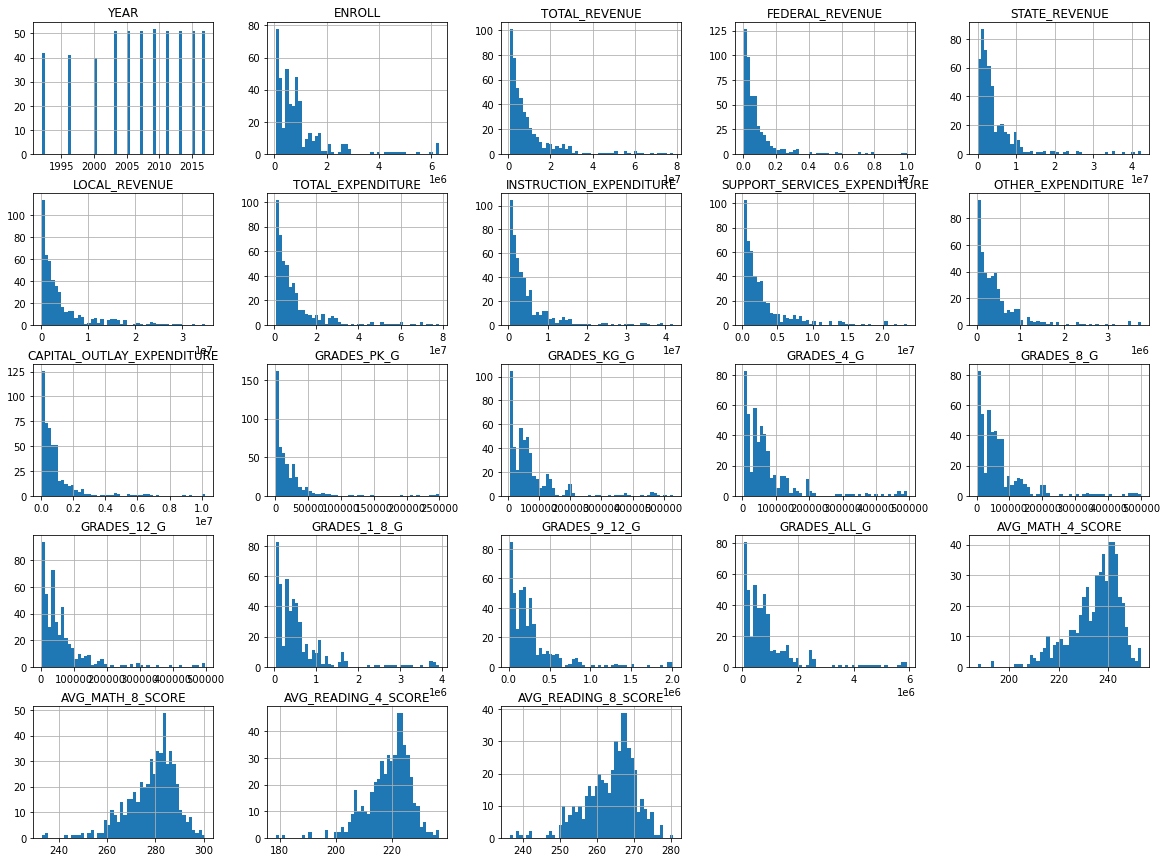

In [147]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [148]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

In [149]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 892 to 432
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   425 non-null    object 
 1   STATE                         425 non-null    object 
 2   YEAR                          425 non-null    int64  
 3   ENROLL                        358 non-null    float64
 4   TOTAL_REVENUE                 388 non-null    float64
 5   FEDERAL_REVENUE               388 non-null    float64
 6   STATE_REVENUE                 388 non-null    float64
 7   LOCAL_REVENUE                 388 non-null    float64
 8   TOTAL_EXPENDITURE             388 non-null    float64
 9   INSTRUCTION_EXPENDITURE       388 non-null    float64
 10  SUPPORT_SERVICES_EXPENDITURE  388 non-null    float64
 11  OTHER_EXPENDITURE             358 non-null    float64
 12  CAPITAL_OUTLAY_EXPENDITURE    388 non-null    float64
 13  GRA

In [150]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 7 to 1463
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   107 non-null    object 
 1   STATE                         107 non-null    object 
 2   YEAR                          107 non-null    int64  
 3   ENROLL                        81 non-null     float64
 4   TOTAL_REVENUE                 93 non-null     float64
 5   FEDERAL_REVENUE               93 non-null     float64
 6   STATE_REVENUE                 93 non-null     float64
 7   LOCAL_REVENUE                 93 non-null     float64
 8   TOTAL_EXPENDITURE             93 non-null     float64
 9   INSTRUCTION_EXPENDITURE       93 non-null     float64
 10  SUPPORT_SERVICES_EXPENDITURE  93 non-null     float64
 11  OTHER_EXPENDITURE             81 non-null     float64
 12  CAPITAL_OUTLAY_EXPENDITURE    93 non-null     float64
 13  GRAD

In [151]:
school = train_set.copy()

In [152]:

correlation_matrix

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,1.000000,0.066836,0.208947,0.226045,0.191476,0.205668,0.201751,0.205389,0.218916,0.177179,...,0.028880,0.039842,0.101810,0.028850,0.065308,0.024284,0.670690,0.468277,0.304198,0.171683
ENROLL,0.066836,1.000000,0.944807,0.948431,0.940021,0.870182,0.948195,0.911229,0.948967,0.972671,...,0.998955,0.998985,0.988117,0.999232,0.997578,0.999492,0.036114,-0.006183,-0.049252,-0.024613
TOTAL_REVENUE,0.208947,0.944807,1.000000,0.926035,0.972682,0.960919,0.999200,0.991134,0.995558,0.952367,...,0.920616,0.929806,0.950622,0.921281,0.943138,0.924283,0.157544,0.109098,0.054267,0.007999
FEDERAL_REVENUE,0.226045,0.948431,0.926035,1.000000,0.925830,0.831913,0.926202,0.888990,0.929506,0.958794,...,0.917014,0.925354,0.951040,0.917914,0.938383,0.920932,0.106879,0.031648,-0.057461,-0.006064
STATE_REVENUE,0.191476,0.940021,0.972682,0.925830,1.000000,0.873223,0.970978,0.955313,0.969353,0.954272,...,0.918843,0.928105,0.956256,0.918404,0.944218,0.921621,0.122776,0.068496,-0.002349,0.002404
LOCAL_REVENUE,0.205668,0.870182,0.960919,0.831913,0.873223,1.000000,0.960906,0.967922,0.953922,0.869571,...,0.845965,0.854499,0.864878,0.847666,0.863900,0.848296,0.191690,0.159357,0.133533,0.016313
TOTAL_EXPENDITURE,0.201751,0.948195,0.999200,0.926202,0.970978,0.960906,1.000000,0.991252,0.994234,0.953119,...,0.924113,0.932972,0.951347,0.924824,0.945541,0.927881,0.152962,0.105243,0.049995,0.011125
INSTRUCTION_EXPENDITURE,0.205389,0.911229,0.991134,0.888990,0.955313,0.967922,0.991252,1.000000,0.979154,0.917598,...,0.888460,0.897338,0.915690,0.889209,0.910442,0.889469,0.157418,0.112338,0.071893,0.023799
SUPPORT_SERVICES_EXPENDITURE,0.218916,0.948967,0.995558,0.929506,0.969353,0.953922,0.994234,0.979154,1.000000,0.957726,...,0.925909,0.934763,0.956921,0.926328,0.948142,0.930063,0.159468,0.110174,0.050984,0.004020
OTHER_EXPENDITURE,0.177179,0.972671,0.952367,0.958794,0.954272,0.869571,0.953119,0.917598,0.957726,1.000000,...,0.970409,0.970971,0.980987,0.970050,0.977476,0.971099,0.097610,0.030065,-0.020533,-0.010717


In [153]:
correlation_matrix = school.corr()
correlation_matrix['AVG_MATH_8_SCORE'].sort_values(ascending=False)

AVG_MATH_8_SCORE                1.000000
AVG_MATH_4_SCORE                0.910990
AVG_READING_4_SCORE             0.854213
YEAR                            0.468277
LOCAL_REVENUE                   0.159357
INSTRUCTION_EXPENDITURE         0.112338
SUPPORT_SERVICES_EXPENDITURE    0.110174
TOTAL_REVENUE                   0.109098
TOTAL_EXPENDITURE               0.105243
AVG_READING_8_SCORE             0.090852
GRADES_PK_G                     0.086981
STATE_REVENUE                   0.068496
CAPITAL_OUTLAY_EXPENDITURE      0.041112
FEDERAL_REVENUE                 0.031648
OTHER_EXPENDITURE               0.030065
GRADES_12_G                     0.024876
GRADES_9_12_G                  -0.003286
ENROLL                         -0.006183
GRADES_ALL_G                   -0.016782
GRADES_8_G                     -0.023110
GRADES_1_8_G                   -0.032309
GRADES_4_G                     -0.033999
GRADES_KG_G                    -0.035904
Name: AVG_MATH_8_SCORE, dtype: float64

# Notamos uma Alta relação em AVG_MATH_4_SCORE com a nossa variável dependente

In [154]:
sample_incomplete_rows = school[school.isnull().any(axis=1)]
sample_incomplete_rows

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1488,2017_WASHINGTON,WASHINGTON,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.701001,289.131257,223.123409,267.744778
1457,2017_KANSAS,KANSAS,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.212805,285.283508,223.268429,267.675679
1485,2017_UTAH,UTAH,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.480766,286.816559,225.159173,260.342577
1215,2015_OREGON,OREGON,2015,570376.0,7111710.0,577106.0,3678001.0,2856603.0,7011609.0,3650855.0,...,44558.0,43067.0,48735.0,353184.0,181598.0,NaN,237.746709,282.814899,220.222720,265.879220
1467,2017_MONTANA,MONTANA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.721634,285.600437,222.326722,266.035007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,1992_MISSISSIPPI,MISSISSIPPI,1992,NaN,1684706.0,277706.0,901199.0,505801.0,1691990.0,956104.0,...,39839.0,38132.0,26328.0,321614.0,129554.0,451986.0,201.828261,246.458035,201.529328,NaN
1451,2017_GEORGIA,GEORGIA,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,236.383603,281.035488,219.682925,266.553369
23,1992_MINNESOTA,MINNESOTA,1992,NaN,4684684.0,194092.0,2380754.0,2109838.0,4981125.0,2534882.0,...,62606.0,59810.0,53813.0,500938.0,224426.0,731758.0,228.493596,282.392205,218.301709,NaN
241,1996_OREGON,OREGON,1996,527769.0,3375710.0,192228.0,1822648.0,1360834.0,3509765.0,1879638.0,...,41373.0,42862.0,34794.0,337917.0,157020.0,495815.0,223.476165,276.341513,214.442087,NaN


Vemos que temos muitas informações faltantes em algumas linhas, vamos apagar porque não faz sentindo usar elas pela falta de informação

In [155]:
school = school.dropna(axis=0,how="all", subset=['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE'])
sample_incomplete_rows = school[school.isnull().any(axis=1)]
sample_incomplete_rows

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1215,2015_OREGON,OREGON,2015,570376.0,7111710.0,577106.0,3678001.0,2856603.0,7011609.0,3650855.0,...,44558.0,43067.0,48735.0,353184.0,181598.0,NaN,237.746709,282.814899,220.222720,265.879220
22,1992_MICHIGAN,MICHIGAN,1992,NaN,9963137.0,537917.0,2539380.0,6885840.0,10170688.0,4681327.0,...,118963.0,114282.0,90655.0,968910.0,419351.0,1398802.0,219.878352,267.353194,NaN,NaN
30,1992_NEW_JERSEY,NEW_JERSEY,1992,NaN,10814689.0,416063.0,4504718.0,5893908.0,10452340.0,6042936.0,...,82909.0,77779.0,67353.0,671021.0,295337.0,975481.0,227.148047,271.905561,219.390468,NaN
36,1992_OKLAHOMA,OKLAHOMA,1992,NaN,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,...,48793.0,44163.0,33346.0,387659.0,157824.0,550342.0,220.319806,268.131990,NaN,NaN
29,1992_NEW_HAMPSHIRE,NEW_HAMPSHIRE,1992,NaN,1063391.0,31020.0,86296.0,946075.0,1066647.0,581123.0,...,15611.0,13537.0,10752.0,123475.0,47999.0,172479.0,229.664564,278.216326,223.466140,NaN
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,...,60287.0,52815.0,40426.0,472622.0,189795.0,678498.0,217.317708,264.825493,209.645497,NaN
231,1996_NEBRASKA,NEBRASKA,1996,289251.0,1909834.0,100886.0,574359.0,1234589.0,1940808.0,1067391.0,...,21440.0,22912.0,19786.0,176868.0,89121.0,270093.0,227.543993,282.769607,NaN,262.061714
27,1992_NEBRASKA,NEBRASKA,1992,NaN,1542413.0,85423.0,492256.0,964734.0,1534046.0,909159.0,...,22133.0,21379.0,18999.0,177432.0,79975.0,260541.0,225.332648,277.654523,220.034963,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
19,1992_MAINE,MAINE,1992,NaN,1206819.0,73160.0,511654.0,622005.0,1228869.0,685350.0,...,17154.0,15969.0,13882.0,135320.0,59289.0,195882.0,231.638840,278.635384,228.380027,NaN


Vamos preenhcer "Enroll" e as notas médias faltantes com null com a mediana dos valores dessa coluna, além de aplicar com pipleline o StandardScaler

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Removendo as variáveis independentes numéricas.
school_num = school.drop(['PRIMARY_KEY', 'STATE'], axis=1)

# Cria um imputer que substitui células inválidas (NaN) pela mediana dos valores da coluna à qual a célula pertence.
imputer = SimpleImputer(strategy='median')


meu_imputer = SimpleImputer(strategy='median')
meu_scaler = StandardScaler()

num_pipeline = Pipeline([
    ('imputer', meu_imputer),
    ('std_scaler', meu_scaler),
])

school_num_tr = num_pipeline.fit_transform(school_num)
school_num_tr

array([[ 0.44725242,  0.04396975,  0.43578014, ...,  1.98020799,
         1.86354823,  0.48470234],
       [ 1.04771588, -0.37845848, -0.42342667, ..., -0.72027162,
        -1.3157938 ,  2.01638727],
       [ 1.34794761, -0.19046787, -0.177648  , ..., -0.05851614,
         1.14601174,  0.69488844],
       ...,
       [ 0.14702069, -0.76622298, -0.6298578 , ...,  1.21535339,
         1.17037822, -0.78720652],
       [ 1.34794761, -0.01380025, -0.01145599, ...,  0.68179973,
         0.63794767, -0.68733612],
       [-0.90379036, -0.37219783, -0.55806159, ..., -2.39039265,
        -2.03722572,  0.20173577]])

In [165]:
school_limpo = pd.DataFrame(school_num_tr, columns=school_num.columns)
school_limpo
school_x_train = school_limpo.drop('AVG_MATH_8_SCORE', axis=1)
school_labels = school_limpo['AVG_READING_8_SCORE'].copy()

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=RANDOM_SEED)
tree_reg = DecisionTreeRegressor(random_state=RANDOM_SEED)
lin_reg = LinearRegression()

lin_scores = cross_val_score(
    lin_reg,  # modelo
    school_x_train,  # X_train
    school_labels,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=3,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)
lin_rmse_scores = np.sqrt(-lin_scores)


def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())


display_scores(lin_rmse_scores)

Scores: [0. 0. 0.]
Mean: 2.1644157186071503e-15
Standard deviation: 3.212531208954864e-16
